# **Proyek Analisis Data: Bike-sharing-dataset**
- Nama: Muhammad Daffa Fahreza
- Email: m.daffa401@gmail.com
- Id Dicoding: mdaffafahreza

## Menentukan Pertanyaan Bisnis

1. Seberapa berpengaruhkah suhu udara terhdapap peminjaman sepeda setiap harinya?
2. Berapa banyak rata-rata peminjaman sepeda dalam satu bulan?
3. Pada bulan ke berapa peminjaman sepeda sampai ke puncaknya?

## Import Semua Packages/Library yang Digunakan

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Data Wrangling

### 1.1 Gathering Data

In [30]:
data_dir = "/ProjekAnalisaDataPython/Bike-sharing-dataset/data"

day_df = pd.read_csv(data_dir + '/day.csv')
hour_df = pd.read_csv(data_dir + '/hour.csv')

data = {
    'day': day_df,
    'hour': hour_df
}

In [16]:
data['hour'].head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
data['day'].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### 1.2 Assessing Data

1.2.1 Periksa Tipe Data

In [33]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [32]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### 1.3 Cleaning Data

In [34]:
# Initialize a dictionary to store duplicate counts and total sample counts
duplicate_counts = {}
total_sample_counts = {}

# Calculate and store the duplicate counts and total sample counts for each DataFrame
for df_name, df in data.items():
    duplicate_counts[df_name] = df.duplicated().sum()
    total_sample_counts[df_name] = len(df)  # Calculate the total number of samples

# Create DataFrames from the dictionaries
duplicate_counts_df = pd.DataFrame.from_dict(duplicate_counts, orient='index', columns=['Duplicate Count'])
total_sample_counts_df = pd.DataFrame.from_dict(total_sample_counts, orient='index', columns=['Total Sample Count'])

# Combine the two DataFrames by concatenating them horizontally
pd.concat([total_sample_counts_df, duplicate_counts_df], axis=1)

,Total Sample Count,Duplicate Count
day,731,0
hour,17379,0


1.3.1 Cek Apakah Ada Data Yang Hilang

In [35]:
null_counts = {}

for df_name, df in data.items():
    null_counts[df_name] = df.isna().sum()
    print(df_name, '\n', null_counts[df_name], '\n')

day 
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 

hour 
 instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



### **1.3 Data Cleaning**

In [40]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


## Exploratory Data Analysis (EDA)

In [41]:
# Data berdasarkan suhu udara setiap hari
day_df.groupby(by="atemp").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant   cnt                  
         nunique   max   min    mean std
atemp                                   
0.079070       1   981   981   981.0 NaN
0.098839       1   986   986   986.0 NaN
0.101658       1  1529  1529  1529.0 NaN
0.116175       1   822   822   822.0 NaN
0.117930       1  1416  1416  1416.0 NaN
...          ...   ...   ...     ...  ..
0.794829       1  3606  3606  3606.0 NaN
0.804287       1  3285  3285  3285.0 NaN
0.804913       1  4840  4840  4840.0 NaN
0.826371       1  3784  3784  3784.0 NaN
0.840896       1  3387  3387  3387.0 NaN

[690 rows x 5 columns]

In [50]:
day_df['cnt'] = pd.to_numeric(day_df['cnt'], errors='coerce')
print(day_df.isna().sum())
total = day_df.sum()
print("Total:", total)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Total: instant                                                  267546
dteday        2011-01-012011-01-022011-01-032011-01-042011-0...
season                                                     1825
yr                                                          366
mnth                                                       4766
holiday                                                      21
weekday                                                    2191
workingday                                                  500
weathersit                                                 1020
temp                                                  362.12628
atemp                                                346.752766
hum                 

In [42]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [43]:
hour_df.groupby(by="atemp").agg({
    "instant": "nunique",
    "cnt": ["max", "min", "mean", "std"]
})

instant  cnt                             
       nunique  max  min        mean         std
atemp                                           
0.0000       2   27   12   19.500000   10.606602
0.0152       4    8    1    3.250000    3.304038
0.0303       8   40    1   13.875000   14.970805
0.0455       9  152    1   32.666667   48.327011
0.0606      14  315    1   49.000000   89.117036
...        ...  ...  ...         ...         ...
0.9091       5  414  230  308.000000   78.755952
0.9242       5  539  115  256.200000  171.754767
0.9545       1  115  115  115.000000         NaN
0.9848       2  133  123  128.000000    7.071068
1.0000       1  101  101  101.000000         NaN

[65 rows x 5 columns]

In [52]:
hour_df['cnt'] = pd.to_numeric(hour_df['cnt'], errors='coerce')
print(hour_df.isna().sum())
total = hour_df.sum()
print("Total:", total)

instant           0
dteday            0
season            0
yr                0
mnth              0
hr                0
holiday           0
weekday           0
workingday        0
weathersit        0
temp              0
atemp             0
hum               0
windspeed         0
casual            0
registered        0
cnt           16648
dtype: int64
Total: instant                                               151023510
dteday        2011-01-012011-01-012011-01-012011-01-012011-0...
season                                                    43476
yr                                                         8734
mnth                                                     113620
hr                                                       200671
holiday                                                     500
weekday                                                   52201
workingday                                                11865
weathersit                                                24770


In [53]:
# Rataan peminjaman sepeda perbulan
monthly_rentals = day_df.groupby('mnth')['cnt'].sum()
days_in_month = day_df.groupby('mnth')['dteday'].nunique()
average_rentals_per_month = monthly_rentals / days_in_month
print("Rata-rata peminjaman sepeda dalam satu bulan:")
print(average_rentals_per_month)

Rata-rata peminjaman sepeda dalam satu bulan:
mnth
1     2176.338710
2     2655.298246
3     3692.258065
4     4484.900000
5     5349.774194
6     5772.366667
7     5563.677419
8     5664.419355
9     5766.516667
10    5199.225806
11    4247.183333
12    3403.806452
dtype: float64


In [54]:
# peminjaman tertinggi dalam bulan
monthly_rentals = day_df.groupby('mnth')['cnt'].sum()
bulan_puncak = monthly_rentals.idxmax()
print("Peminjaman sepeda mencapai puncak pada bulan ke:", bulan_puncak)

Peminjaman sepeda mencapai puncak pada bulan ke: 8


## Visualization & Explanatory Analysis

1. Seberapa berpengaruhkah suhu udara terhdapap peminjaman sepeda setiap harinya?

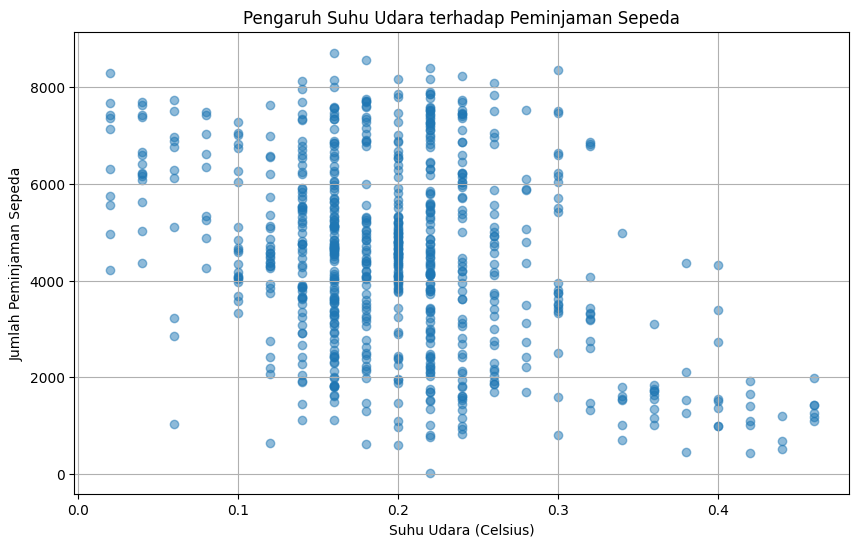

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(hour_df['temp'], hour_df['cnt'], alpha=0.5)
plt.title('Pengaruh Suhu Udara terhadap Peminjaman Sepeda')
plt.xlabel('Suhu Udara (Celsius)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.grid(True)
plt.show()

2. Berapa banyak rata-rata peminjaman sepeda dalam satu bulan?

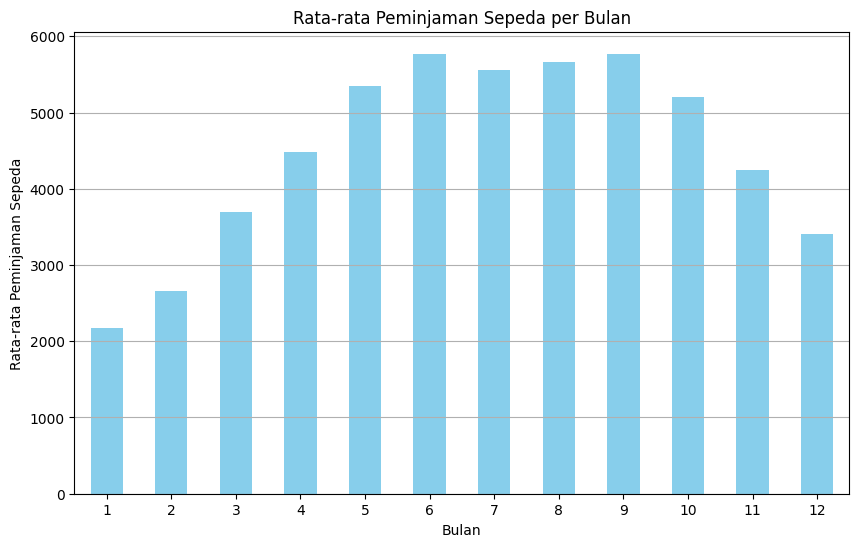

In [56]:
plt.figure(figsize=(10, 6))
average_rentals_per_month.plot(kind='bar', color='skyblue')
plt.title('Rata-rata Peminjaman Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Peminjaman Sepeda')
plt.xticks(rotation=0)  # Rotasi label sumbu x
plt.grid(axis='y')  # Tampilkan grid hanya pada sumbu y
plt.show()

3. Pada bulan ke berapa peminjaman sepeda sampai ke puncaknya?

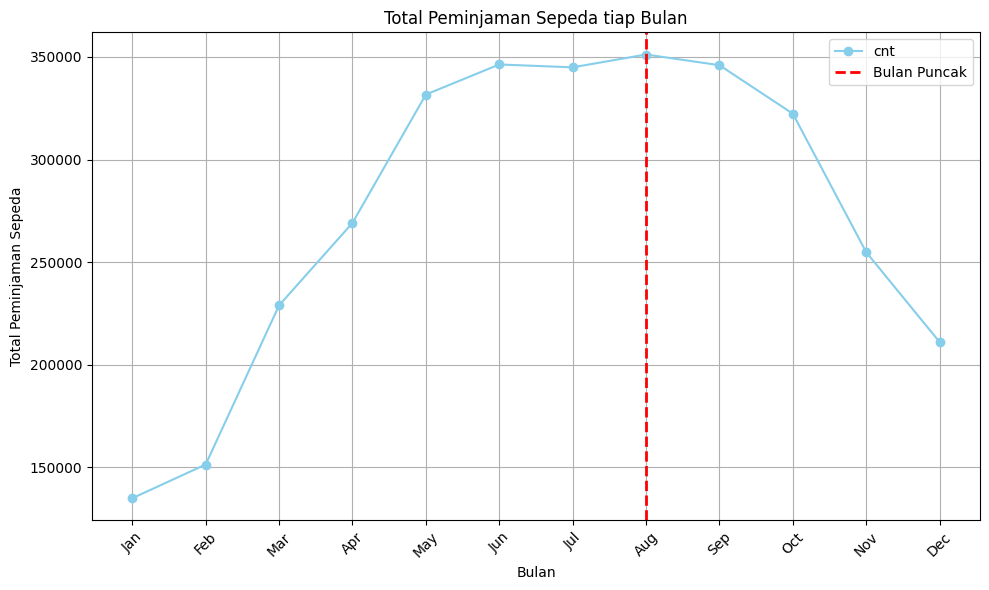

In [58]:
plt.figure(figsize=(10, 6))
monthly_rentals.plot(color='skyblue', marker='o', linestyle='-')
plt.title('Total Peminjaman Sepeda tiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman Sepeda')
plt.xticks(monthly_rentals.index, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.axvline(x=bulan_puncak, color='red', linestyle='--', linewidth=2, label='Bulan Puncak')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Scatter plot yang kita lihat menunjukkan adanya korelasi positif antara suhu udara dan jumlah peminjaman sepeda. Artinya, ketika suhu udara meningkat, jumlah peminjaman sepeda juga cenderung meningkat.

- Conclution pertanyaan 2 : Bar plot ini memberikan gambaran tentang rata-rata jumlah peminjaman sepeda setiap bulan, menunjukkan fluktuasi dalam penggunaan sepeda selama periode yang diteliti. Plot ini, yang diwarnai dengan biru, dengan jelas menunjukkan bulan-bulan dengan rata-rata peminjaman sepeda paling tinggi dan paling rendah. Dengan menganalisis visual ini, kita mendapatkan pemahaman yang berharga tentang pola musiman dalam penggunaan sepeda. Informasi ini bisa digunakan untuk merencanakan strategi manajemen dan pemasaran yang lebih efektif, serta menyesuaikan layanan dengan permintaan yang berubah-ubah sepanjang tahun.

- Conclution pertanyaan 3 : Grafik ini menggambarkan pola bulanan total peminjaman sepeda, di mana setiap titik menunjukkan jumlah peminjaman pada bulan tertentu. Bulan dengan peminjaman sepeda terbanyak ditandai dengan garis merah vertikal. Melalui analisis grafik ini, kita dapat memahami pola umum penggunaan layanan peminjaman sepeda sepanjang tahun, mengidentifikasi bulan-bulan penting di mana permintaan mencapai titik tertinggi, dan mengamati pola musiman dalam penggunaan sepeda.